In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arabic-hwr-ai-pro-intake1/sample_submission.csv
/kaggle/input/arabic-hwr-ai-pro-intake1/train.csv
/kaggle/input/arabic-hwr-ai-pro-intake1/test.csv
/kaggle/input/arabic-hwr-ai-pro-intake1/test/01301.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/02578.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/00929.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/02630.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/01883.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/00704.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/03163.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/01124.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/01570.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/03092.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/02640.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/02422.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/02284.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/00562.png
/kaggle/input/arabic-hwr-ai-pro-intake1/test/02715.png
/kaggle/input/

In [2]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path
from PIL import Image

## less Important
from functools import partial
import os
from scipy import stats
import missingno as msno
import joblib
import tarfile
import shutil
import urllib

## Sklearn
from sklearn import datasets
## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
## Metrics
from sklearn.metrics import accuracy_score

## tensorflow & Keras
import tensorflow as tf    ## i will use tf for every thing and for keras using tf.keras

## Loading the Data and Look at the Big Picture

`Only for training here`

In [3]:
train_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/train.csv')
train_images = Path(r'../input/arabic-hwr-ai-pro-intake1/train')

## read these all training images paths as Series
train_images_paths = pd.Series(sorted(list(train_images.glob(r'*.png'))), name='Filepath').astype(str)

train_images_paths.head()

0    ../input/arabic-hwr-ai-pro-intake1/train/00000...
1    ../input/arabic-hwr-ai-pro-intake1/train/00001...
2    ../input/arabic-hwr-ai-pro-intake1/train/00002...
3    ../input/arabic-hwr-ai-pro-intake1/train/00003...
4    ../input/arabic-hwr-ai-pro-intake1/train/00004...
Name: Filepath, dtype: object

## Explore the Data

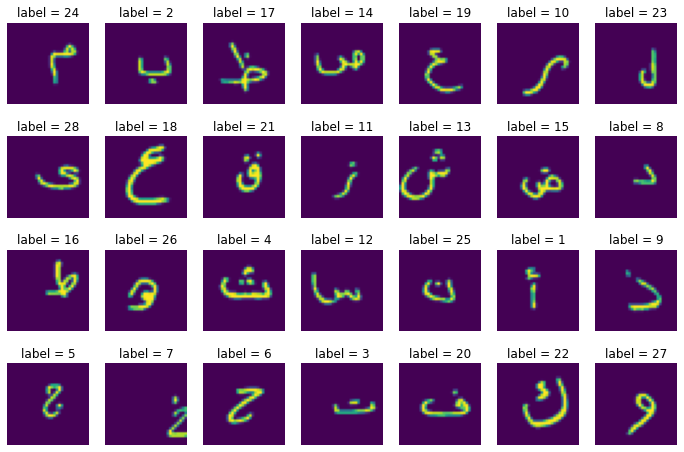

In [4]:
img_key_value = {}
for value in train_labels['label'].unique():
    img_key_value[value] = train_labels[train_labels['label']==value].index[0]
    
img_index = list(img_key_value.values())
img_label = list(img_key_value.keys())

fig, ax = plt.subplots(4, 7, figsize=(12, 8))

i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        plt.title(f'label = {img_label[i]}')
        img = plt.imread(train_images_paths.iloc[img_index[i]])
        plt.imshow(img)
        plt.axis('off')
        i+=1

In [5]:
print('Number of Instances in train_set =>', len(train_images_paths))
print('Number of Instances in train_labels =>', len(train_labels))

print()

img = plt.imread(train_images_paths.iloc[img_index[0]])
print('shape of each Image is =>', img.shape)

Number of Instances in train_set => 13440
Number of Instances in train_labels => 13440

shape of each Image is => (32, 32, 4)


## Data Preprocessing

In [6]:
train_full_labels = train_labels['label'].values
train_full_set = np.empty((13440, 32, 32, 3), dtype=np.float32)  #take only the first 3 channels

for idx, path in enumerate(train_images_paths):
    img = plt.imread(path)
    img = img[:,:,:3]
    train_full_set[idx] = img
    
print('train_full_set.shape =>', train_full_set.shape)
print('train_full_labels.shape =>', train_full_labels.shape)

train_full_set.shape => (13440, 32, 32, 3)
train_full_labels.shape => (13440,)


## Split the Data

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(train_full_set, train_full_labels, 
                                                      test_size=0.2, shuffle=True, random_state=42)

print('X_train.shape =>', X_train.shape)
print('X_valid.shape =>', X_valid.shape)
print('y_train.shape =>', y_train.shape)
print('y_valid.shape =>', y_valid.shape)

X_train.shape => (10752, 32, 32, 3)
X_valid.shape => (2688, 32, 32, 3)
y_train.shape => (10752,)
y_valid.shape => (2688,)


## Model Training

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow. keras. layers import Dense, Dropout, Flatten, Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras import backend as K
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, MobileNet,MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,AveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, Adadelta
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from keras.callbacks import LearningRateScheduler,ReduceLROnPlateau

In [9]:
input_shape=(32,32,3)
num_classes=29
batch_size = 128 # Handle 128 pictures at each round
epochs = 100

In [10]:
def model_cnn1(input_shape=input_shape,num_classes=num_classes):   
    model = Sequential()

    # Add convolutional layer consisting of 32 filters and shape of 3x3 with ReLU activation
    # We want to preserve more information for following layers so we use padding
    # 'Same' padding tries to pad evenly left and right, 
    # but if the amount of columns to be added is odd, it will add the extra column to the right
    model.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
    model.add(BatchNormalization())

    # Add convolutional layer consisting of 32 filters and shape of 5x5 with ReLU activation
    # We give strides=2 for space between each sample on the pixel grid
    model.add(Conv2D(32, kernel_size = (5,5), strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    # Dropping %40 of neurons
    model.add(Dropout(0.4))
    
    model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = (5,5), strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(Conv2D(128, kernel_size = 4, activation='relu'))
    model.add(BatchNormalization())
    # To be able to merge into fully connected layer we have to flatten
    model.add(Flatten())
    model.add(Dropout(0.4))
    # Lets add softmax activated neurons as much as number of classes
    model.add(Dense(num_classes, activation = "softmax"))
    # Compile the model with loss and metrics
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    
    return model

In [11]:
def model_cnn2(input_shape=input_shape,num_classes=num_classes): 
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(2, 2), strides=(1, 1), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())

    model.add(Conv2D(128, kernel_size=(4, 4), strides=(1, 1), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, kernel_size=(4, 4), strides=(1, 1), activation='relu', padding='same'))
    model.add(BatchNormalization())

    model.add(Conv2D(512, kernel_size=(4, 4), strides=(1, 1), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Flatten())

    # model.add(Dense(512, activation='elu'))
    # model.add(BatchNormalization())
    # model.add(Dropout(droprate))

    # model.add(Dense(256, activation='elu'))
    # model.add(BatchNormalization())
    # model.add(Dropout(droprate))

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

In [12]:
def LeNet5(input_shape=input_shape,num_classes=num_classes):
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape, padding="same"))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
    model.add(Flatten())
    model.add(Dense(84, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

In [13]:
# num_classes = 29
# img_rows, img_cols = 32,32
# droprate = 0.25
# # MODEL
# input_shape = (img_rows, img_cols, 3)
# model = Sequential()
# model.add(Conv2D(64, kernel_size=(2, 2), strides=(1, 1), activation='relu', input_shape=input_shape))
# model.add(BatchNormalization())

# model.add(Conv2D(128, kernel_size=(4, 4), strides=(1, 1), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, kernel_size=(4, 4), strides=(1, 1), activation='relu', padding='same'))
# model.add(BatchNormalization())

# model.add(Conv2D(512, kernel_size=(4, 4), strides=(1, 1), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(Dropout(droprate))
# model.add(Flatten())

# # model.add(Dense(512, activation='elu'))
# # model.add(BatchNormalization())
# # model.add(Dropout(droprate))

# # model.add(Dense(256, activation='elu'))
# # model.add(BatchNormalization())
# # model.add(Dropout(droprate))

# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(droprate))
# model.add(Dense(num_classes, activation='softmax'))

# model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


My Custom CNN Network1:


2021-11-07 23:58:45.004285: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 23:58:45.125574: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 23:58:45.126418: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-07 23:58:45.127812: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

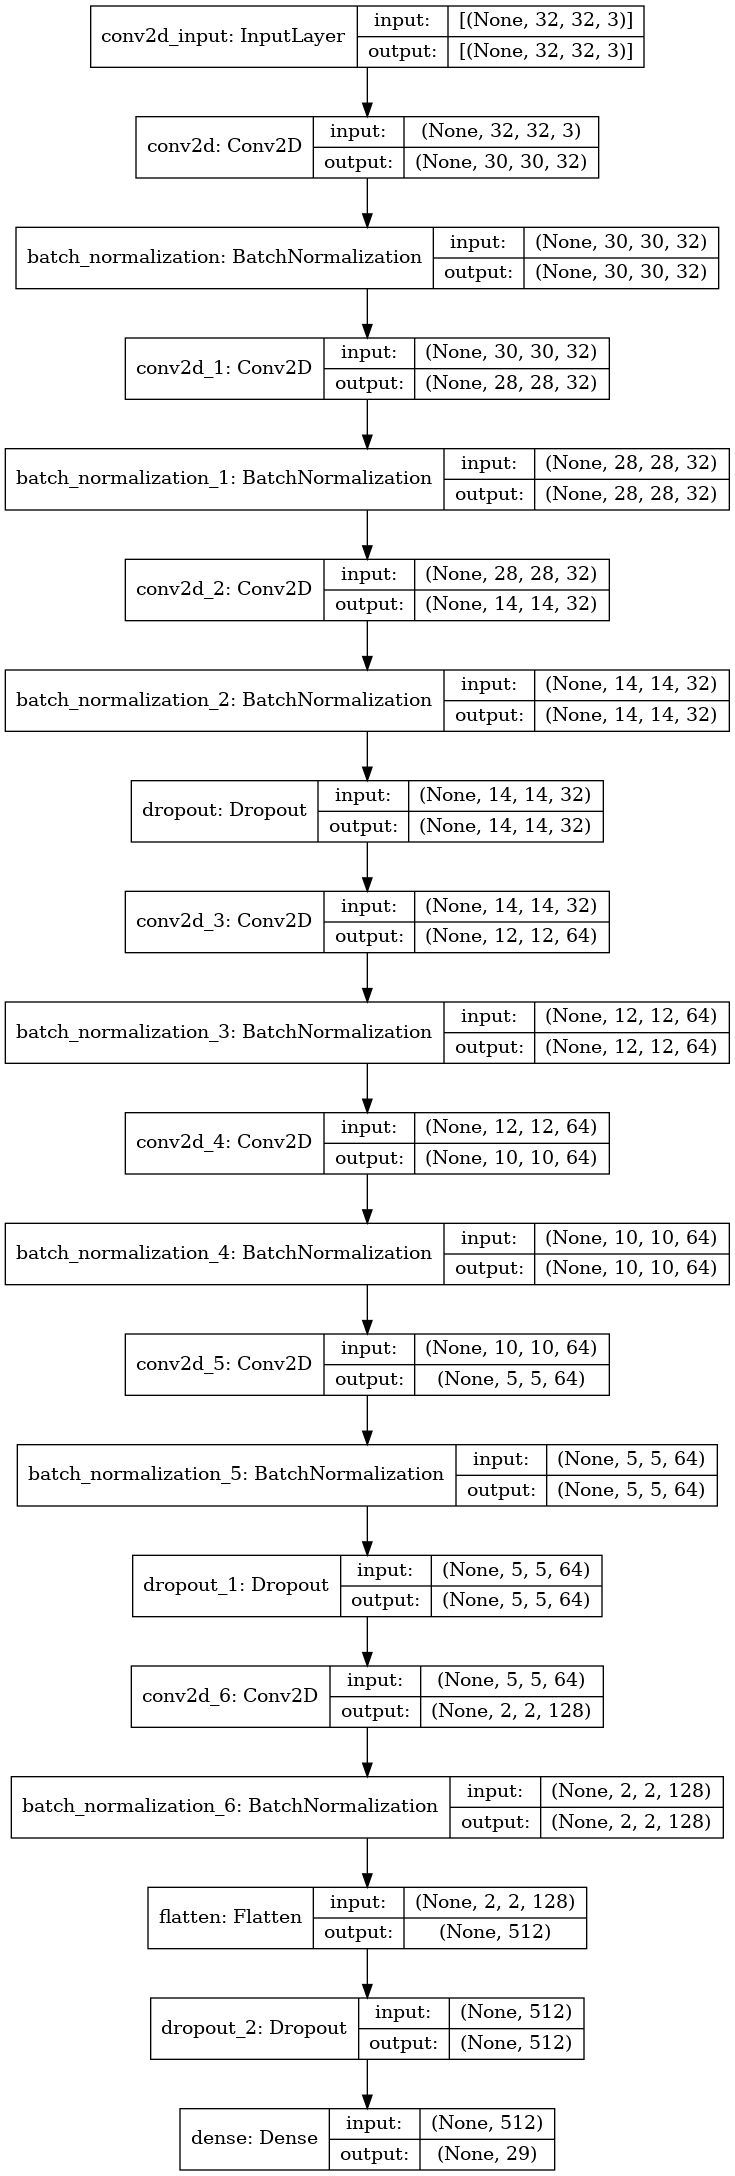

In [14]:
print("My Custom CNN Network1:")
plot_model(model_cnn1(), to_file='custom-cnn1.png', show_shapes=True, show_layer_names=True)

My Custom CNN Network2:


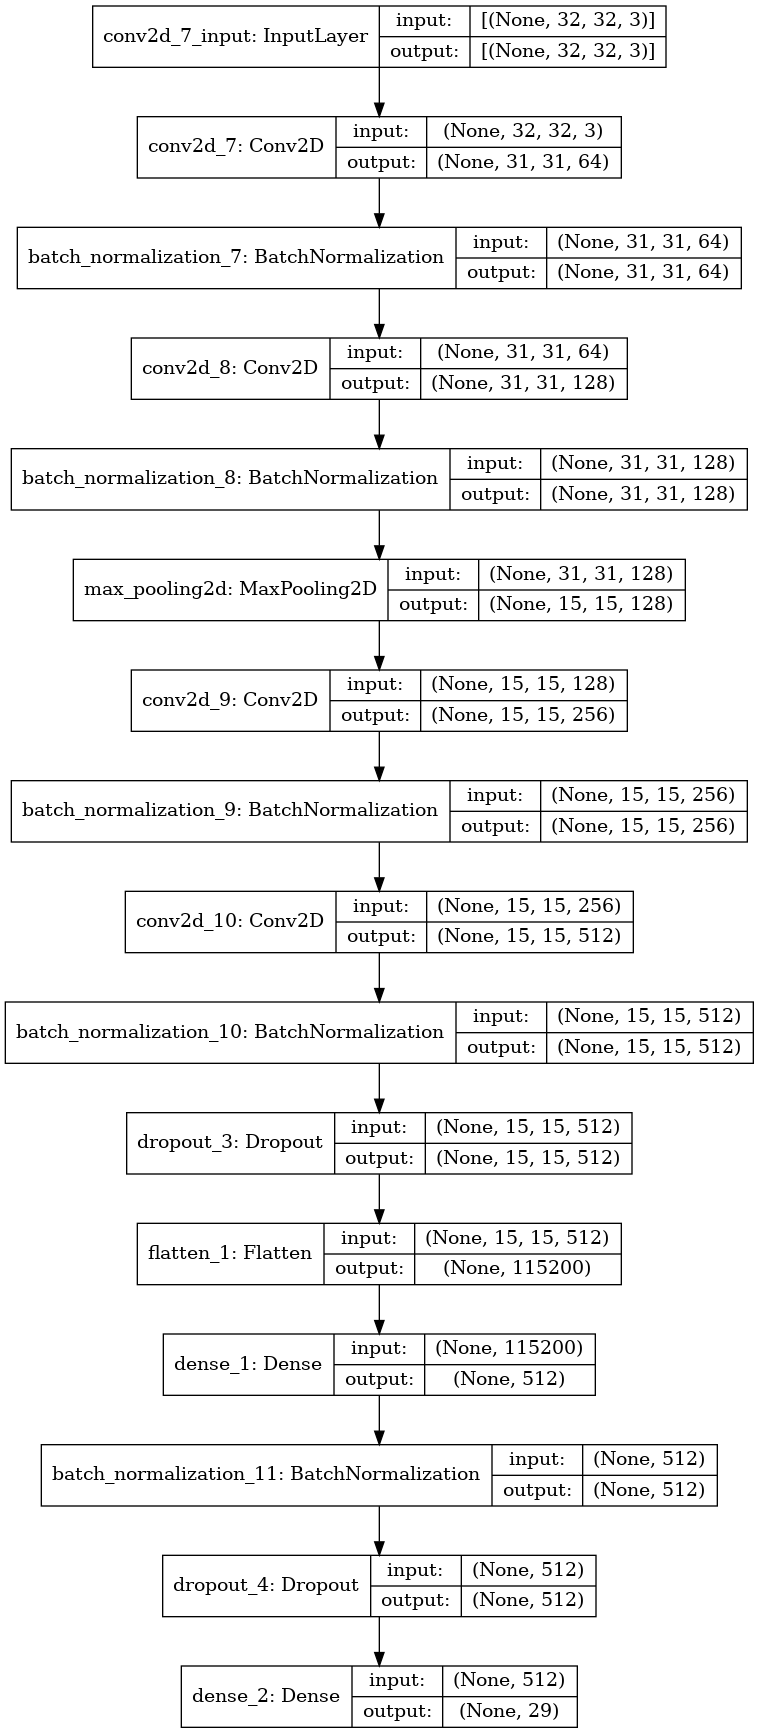

In [15]:
print("My Custom CNN Network2:")
plot_model(model_cnn2(), to_file='custom-cnn2.png', show_shapes=True, show_layer_names=True)

Master Yann LeCun's LeNet-5 Network:


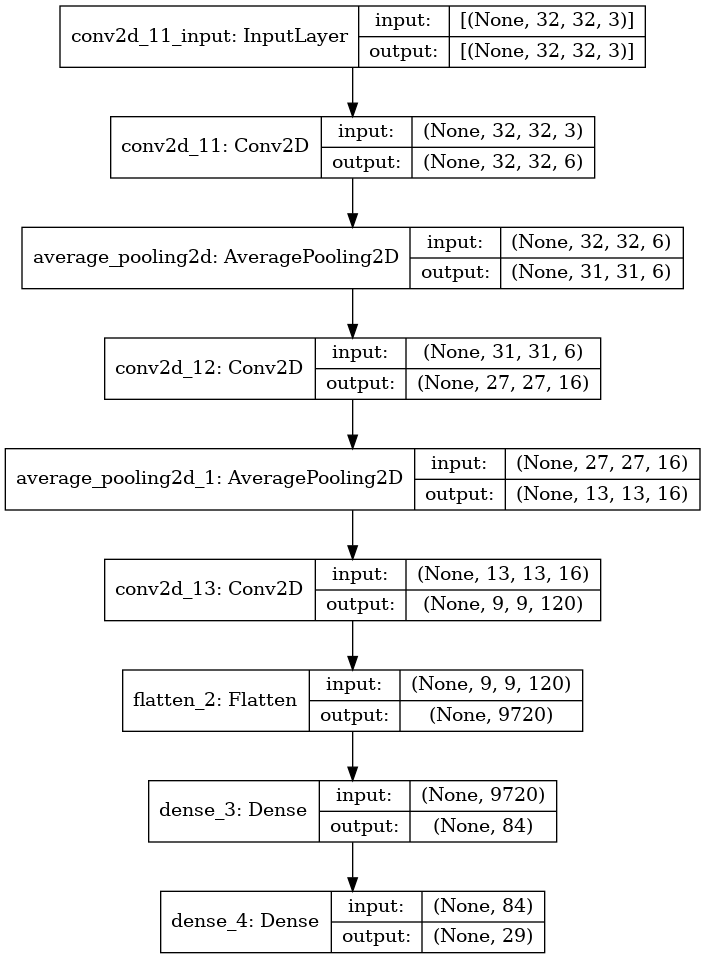

In [16]:
print("Master Yann LeCun's LeNet-5 Network:")
plot_model(LeNet5(), to_file='lenet-5.png', show_shapes=True, show_layer_names=True)

In [17]:
model = []
model.append(model_cnn1())
model.append(model_cnn2())
model.append(LeNet5())

In [18]:
datagen = ImageDataGenerator(rotation_range=10, zoom_range = 0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(X_train)

In [19]:
models = []
for i in range(len(model)):
    model[i].fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                                        epochs = epochs, steps_per_epoch=X_train.shape[0] // batch_size,
                                        validation_data = (X_valid, y_valid), 
                                        callbacks=[ReduceLROnPlateau(monitor='loss', patience=3, factor=0.1)], 
                                        verbose=2)
    models.append(model[i])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-11-07 23:58:49.935708: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-11-07 23:58:51.643801: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


84/84 - 12s - loss: 3.2092 - accuracy: 0.1732 - val_loss: 3.9718 - val_accuracy: 0.0398
Epoch 2/100
84/84 - 5s - loss: 1.9239 - accuracy: 0.4028 - val_loss: 10.6761 - val_accuracy: 0.0335
Epoch 3/100
84/84 - 5s - loss: 1.2430 - accuracy: 0.5897 - val_loss: 19.1075 - val_accuracy: 0.0335
Epoch 4/100
84/84 - 5s - loss: 0.8940 - accuracy: 0.6997 - val_loss: 20.4914 - val_accuracy: 0.0655
Epoch 5/100
84/84 - 5s - loss: 0.6820 - accuracy: 0.7825 - val_loss: 18.1231 - val_accuracy: 0.0443
Epoch 6/100
84/84 - 5s - loss: 0.5633 - accuracy: 0.8176 - val_loss: 28.6517 - val_accuracy: 0.0606
Epoch 7/100
84/84 - 5s - loss: 0.4901 - accuracy: 0.8383 - val_loss: 1.4619 - val_accuracy: 0.5666
Epoch 8/100
84/84 - 5s - loss: 0.4365 - accuracy: 0.8546 - val_loss: 1.1722 - val_accuracy: 0.6696
Epoch 9/100
84/84 - 6s - loss: 0.3822 - accuracy: 0.8768 - val_loss: 0.3127 - val_accuracy: 0.8958
Epoch 10/100
84/84 - 6s - loss: 0.3482 - accuracy: 0.8856 - val_loss: 2.8764 - val_accuracy: 0.5045
Epoch 11/100
84

## Evaluation on Testing DataSet

In [20]:
test_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/test.csv')
test_images = Path(r'../input/arabic-hwr-ai-pro-intake1/test')

## read these all training images paths as Series
test_images_paths = pd.Series(sorted(list(test_images.glob(r'*.png'))), name='Filepath').astype(str)

test_images_paths.head()

0    ../input/arabic-hwr-ai-pro-intake1/test/00000.png
1    ../input/arabic-hwr-ai-pro-intake1/test/00001.png
2    ../input/arabic-hwr-ai-pro-intake1/test/00002.png
3    ../input/arabic-hwr-ai-pro-intake1/test/00003.png
4    ../input/arabic-hwr-ai-pro-intake1/test/00004.png
Name: Filepath, dtype: object

In [21]:
print('Number of Instances in test_set is', len(test_images_paths))

Number of Instances in test_set is 3360


In [22]:
test_full_set = np.empty((3360, 32, 32, 3), dtype=np.float32)  #take only the first 3 channels

for idx, path in enumerate(test_images_paths):
    img = plt.imread(path)
    img = img[:,:,:3]
    test_full_set[idx] = img
    
print('test_full_set.shape =>', test_full_set.shape)

test_full_set.shape => (3360, 32, 32, 3)


In [23]:
import scipy

In [24]:
labels = []
for m in models:
    predicts = np.argmax(m.predict(test_full_set), axis=1)
    labels.append(predicts)
    
# Ensemble with voting
labels = np.array(labels)
labels

array([[26, 10,  1, ...,  4, 11, 20],
       [26, 10,  1, ...,  4, 11, 20],
       [26, 10,  1, ...,  4, 11, 20]])

In [25]:
# labels = np.transpose(labels)
labels = scipy.stats.mode(labels)[0]
labels

array([[26, 10,  1, ...,  4, 11, 20]])

In [26]:
labels = np.squeeze(labels)
labels

array([26, 10,  1, ...,  4, 11, 20])

In [27]:
test_labels['label'] = labels

In [28]:
test_labels

,id,label
0,0,26
1,1,10
2,2,1
3,3,10
4,4,15
...,...,...
3355,3355,16
3356,3356,6
3357,3357,4
3358,3358,11


In [29]:
test_labels[['id', 'label']].to_csv('/kaggle/working/submission.csv', index=False)